# プレゼン用の考察、話せそうなこと

# サンプルの特徴の分析結果
ゲーム的に良いお題とは何なのかを知るためにサンプルをとり分析しました。

In [11]:
import json
from pprint import pprint
from gensim.models import KeyedVectors

# Word2Vecモデルのロード
model = KeyedVectors.load_word2vec_format('bin/model_neo_nouns_only.bin', binary=True)

# サンプルデータの読み込み
with open('word_pairs.json', 'r', encoding='utf-8') as f:
    word_pairs = json.load(f)

# サンプルの表示
print("サンプルのリスト")
pprint(word_pairs)

サンプルのリスト
[['炎', '赤'],
 ['運', '便意'],
 ['コンビニ', 'スーパー'],
 ['コンタクト', 'サングラス'],
 ['サッカー', 'ラグビー'],
 ['りす', 'ハムスター'],
 ['ピアノの教師', '英語の教師'],
 ['ウォータースライダー', '流しそうめん'],
 ['ギプス', 'コルセット'],
 ['チューバ', 'コントラバス'],
 ['嘘つき', 'ぶりっ子'],
 ['洗濯機', '食洗機'],
 ['すき屋', '吉野家'],
 ['しおり', 'アルバム'],
 ['落石', '落雷'],
 ['お賽銭', '募金'],
 ['コーヒー', '紅茶'],
 ['セーラームーン', 'おジャ魔女ドレミ'],
 ['電車', 'バス'],
 ['ネイル', '塗り絵'],
 ['居酒屋', 'バー'],
 ['空腹', '徹夜'],
 ['進路', '線路'],
 ['2000円札', '小判'],
 ['コーンフレーク', 'カロリーメイト'],
 ['ちはやふる', 'ヒカルの碁'],
 ['アフロ', '金髪'],
 ['親子丼', 'のり弁当'],
 ['セミ', '鈴虫'],
 ['スキンヘッド', '電球'],
 ['眉毛カット', 'マツエク'],
 ['サイコロ', 'ルービックキューブ'],
 ['故障', 'エラー'],
 ['野球', '卓球'],
 ['幸運', '大吉'],
 ['カレー', 'シチュー'],
 ['シャンプー', '洗剤'],
 ['海', 'プール'],
 ['ヨット', 'パラシュート'],
 ['サングラス', 'ゴーグル'],
 ['のぞき', 'カンニング'],
 ['スパルタ', '禁欲'],
 ['近道', '裏口'],
 ['１億円', '１０００万'],
 ['果たし状', 'ラブレター'],
 ['嬉し泣き', '悲し泣き'],
 ['マフラー', '手袋'],
 ['ニコチン', 'カフェイン'],
 ['太陽', '月'],
 ['キャビア', 'フカヒレ'],
 ['チョコレート', 'キャラメル'],
 ['水中メガネ', '浮き輪'],
 ['カメムシ', 'カエル'],
 ['村長', '生徒会長'],
 ['三つ編み

## サンプルの品詞
単語の品詞はどのようなものがあるかを調べました。名詞の中の一般、固有名詞、サ変接続がほとんどだということがわかりました。

In [19]:
import ipadic
import MeCab
mecab = MeCab.Tagger(ipadic.MECAB_ARGS)

word_pairs_flatten = [w for t in word_pairs for w in t]

word_n = []
for w in word_pairs_flatten:
    node = mecab.parseToNode(w)
    while node:
        f = node.feature.split(",")
        if f[0] == "名詞":
            word_n.append(f)
        node = node.next
print("サンプルの品詞")
word_n

サンプルの品詞


[['名詞', '一般', '*', '*', '*', '*', '炎', 'ホノオ', 'ホノオ'],
 ['名詞', '一般', '*', '*', '*', '*', '赤', 'アカ', 'アカ'],
 ['名詞', '一般', '*', '*', '*', '*', '運', 'ウン', 'ウン'],
 ['名詞', '一般', '*', '*', '*', '*', '便意', 'ベンイ', 'ベンイ'],
 ['名詞', '一般', '*', '*', '*', '*', 'コンビニ', 'コンビニ', 'コンビニ'],
 ['名詞', '一般', '*', '*', '*', '*', 'スーパー', 'スーパー', 'スーパー'],
 ['名詞', '一般', '*', '*', '*', '*', 'コンタクト', 'コンタクト', 'コンタクト'],
 ['名詞', '一般', '*', '*', '*', '*', 'サングラス', 'サングラス', 'サングラス'],
 ['名詞', '一般', '*', '*', '*', '*', 'サッカー', 'サッカー', 'サッカー'],
 ['名詞', '一般', '*', '*', '*', '*', 'ラグビー', 'ラグビー', 'ラグビー'],
 ['名詞', '一般', '*', '*', '*', '*', 'りす', 'リス', 'リス'],
 ['名詞', '一般', '*', '*', '*', '*', 'ハムスター', 'ハムスター', 'ハムスター'],
 ['名詞', '一般', '*', '*', '*', '*', 'ピアノ', 'ピアノ', 'ピアノ'],
 ['名詞', '一般', '*', '*', '*', '*', '教師', 'キョウシ', 'キョーシ'],
 ['名詞', '一般', '*', '*', '*', '*', '英語', 'エイゴ', 'エイゴ'],
 ['名詞', '一般', '*', '*', '*', '*', '教師', 'キョウシ', 'キョーシ'],
 ['名詞', '一般', '*', '*', '*', '*', 'ウォーター', 'ウォーター', 'ウォーター'],
 ['名詞', '一般', '*', '*', '

## サンプルのコサイン類似度の分布を描画する。
fasttextよってwikiのデータから学習された単語とそのベクトル表現を含むモデルを使用して、特定の単語ペア（単語1と単語2）の間の関係を分析しました。  
それぞれの単語をそれに対応するベクトル（ベクトルaとベクトルb）に変換し、2つのベクトル間の「コサイン類似度」を計算しました。  

コサイン類似度は、二つのベクトルがどれだけ似ているかを測る指標で、値が高いほど二つの単語は意味的に近いことを示します。最終的に、このコサイン類似度の値を用いて、どのように単語間の関係が分布しているかを視覚化しました。この分布図は、単語間の意味的な近さを示すために役立ちます。たとえば、似ている単語はグラフ上で近くに位置するでしょうし、関連性が低い単語は離れた位置に現れるでしょう。

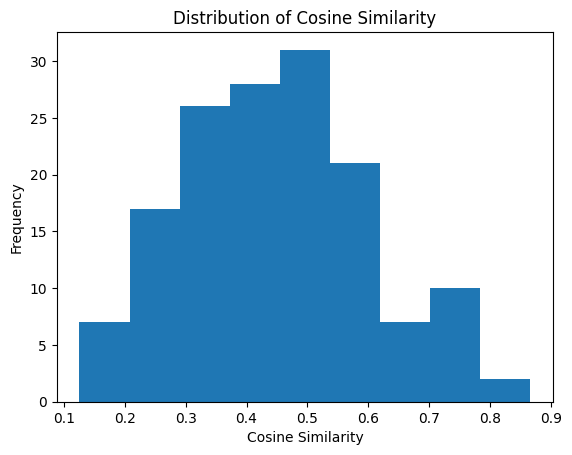

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# コサイン類似度のリストを生成
cosine_similarities = []
not_exist_word_lst = [] # モデルに含まれていない言葉
vector_diff = [] # ベクトルの差のリスト
for word1, word2 in word_pairs:
    if word1 in model.key_to_index and word2 in model.key_to_index:
        similarity = model.similarity(word1, word2)
        vector_diff.append(model[word1] - model[word2])
        cosine_similarities.append((word1, word2, similarity))
        # cosine_similarities.append(similarity)
    else:
        not_exist_word_lst.append((word1, word2))  # 単語がモデルにない場合
cosine_similarities

df = pd.DataFrame(cosine_similarities, columns=["w1", "w2", "score"])

N = len(df)
k = int(np.ceil(1 + np.log2(N)))
plt.hist(df["score"], bins=k)
plt.title("Distribution of Cosine Similarity")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
m = np.array(vector_diff)

## サンプルの単語の文字数の分布
サンプルからは2文字から6文字以内が多いことがわかる。

Text(0, 0.5, 'Frequency')

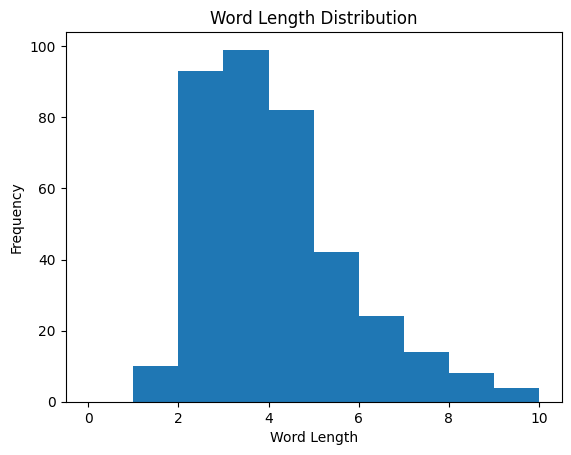

In [14]:
num_of_char_lst = []
for word1, word2 in word_pairs:
    num_of_char_lst.append(len(word1))
    num_of_char_lst.append(len(word2))
plt.hist(num_of_char_lst, bins=np.arange(11))
plt.title("Word Length Distribution")
plt.xlabel("Word Length")
plt.ylabel("Frequency")

## サンプルの抽象度の分布
コサイン類似度や単語の頻度を考慮しても、お題として違和感のあるものが多いです。サンプルのお題を主観的にみると、ぱっと想像できるものや物質的なものが多いです。お題として良くない抽象的な単語は概念的で想像しにくい特性をもっています。  

https://sociocom.naist.jp/awd-j/  
このサイトから入手した単語と抽象度スコアが表になっているデータを使用しました。

1.8878625954198474

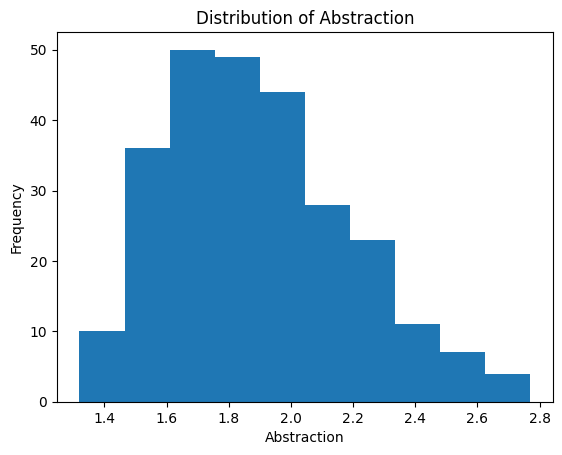

In [15]:
import json
import matplotlib.pyplot as plt
import numpy as np

# テキストファイルのパスを指定
txt_file_path = "bin/AWD-J_EX.txt"

# テキストファイルをDataFrameとして読み込む
df = pd.read_csv(txt_file_path, delimiter='\t', header=0)

# DataFrameの内容を表示
df = df[df["PoS"] == "名詞"]
df = df.reset_index(drop=True)

df_r = pd.read_pickle("bin/frec_jawiki-latest-pages-articles.pkl")
merged_df = df.merge(df_r, on="Word", how="inner")

score_lst = []
for word1, word2 in word_pairs:
    if word1 in merged_df["Word"].values:
        d1 = merged_df[merged_df["Word"] == word1]
        score_lst.append(d1["Score"].iloc[0])
    if word2 in merged_df["Word"].values:
        d2 = merged_df[merged_df["Word"] == word2]
        score_lst.append(d2["Score"].iloc[0])

plt.hist(score_lst, bins=10)
plt.title("Distribution of Abstraction")
plt.xlabel("Abstraction")
plt.ylabel("Frequency")
np.mean(score_lst)

# モデルの単語に関して

## 単語の使用頻度
みんなの語彙力を考えると、知っていて、話せる単語をお題にしなければいけません。fasttextの学習済みのモデルの単語を見るとわからないものがたくさんあります。  
一般的に人々が知っていて話すことができる単語を特定するために、Wikipediaの大量のテキストデータ（3.7GB分）を分析しました。このデータを用いて、単語がどれだけ頻繁に登場するか、つまり「出現頻度」を計測しました。これにより、一般的によく使われる単語のリストを作成することができます。

出現頻度に基づくランキングを作成することで、どの単語が一般的に知られているかを判断しました。自分の主観では、出現頻度が20,000回以上の単語は、ほとんどの人が知っていると考えています。この基準を設定することで、一般的な語彙力に基づいて単語を選ぶことが可能になります。


Frequencyが出現頻度です。

In [16]:
df_frec = pd.read_pickle("bin/frec_jawiki-latest-pages-articles.pkl")
df_frec

,Word,Frequency
0,年,3057925
1,日,1879591
2,月,1278188
3,者,1019071
4,人,982168
...,...,...
10585790,リンクサイクルズ,1
10585791,アドクスセンチメートル,1
10585792,アドクスアドクスセンゴクエンシス,1
10585793,upct,1


# その他の事項

## ある単語にベクトルの差を足しても良い単語が出てこない。
サンプルから2つの言葉のベクトルをそれぞれもとめて、差をとったものを作成し。そのあとある単語にその差のベクトルを足したそのベクトルとコサイン類似度が近いものを選んでもを良いお題ができにくかった。コサイン類似度を使った方とほとんど同じになってしまうのでコサイン類似度の特徴から似た単語を求める方法にした。
<br>
<br>

#### <GPTの要約>
あなたは、単語の意味を表すベクトルを使って、新しい単語のアイディアを生み出そうと試みました。まず、2つの異なる単語（サンプルから選んだ単語）のベクトルを取得し、その差（一方からもう一方を引いた結果）を計算しました。次に、このベクトルの差を別の単語のベクトルに足し、新たなベクトルを作成しました。

この新しいベクトルに基づいて、コサイン類似度が高い単語を探しました。コサイン類似度とは、2つのベクトルの間の角度を計算することで、その単語がどれだけ似ているかを測定する方法です。しかし、この方法では新しい単語を見つけるのが困難であり、結果的に元のコサイン類似度の計算で得られる単語と似たようなものが出てきてしまいました。

この結果から、単にベクトルを操作するだけでは新しい、意味のある単語を見つけるのが難しいことがわかりました。そのため、あなたは元々のコサイン類似度の計算方法に戻り、これを使って似た意味を持つ単語を探すことにしました。これにより、より効果的に関連する単語を見つけることができると考えられます。


# 実行結果
### コサイン類似度、出現頻度、抽象度を考慮に入れたお題生成の実行結果

### パラメータ
・コサイン類似度: 0.45  
・出現頻度: 20000回以上  
・抽象度: 2.4以下(1に近づくほど具体的、値が大きくなると抽象的)

In [11]:
import random
import gensim
test_model = gensim.models.KeyedVectors.load_word2vec_format('wordwolf_model.bin', binary=True)

for i in range(20):
    random_word = random.choice(list(test_model.key_to_index.keys()))
    similar_words_lst = test_model.similar_by_key(random_word)

    min_difference = float('inf')
    nearest_word = None
    for word, similarity in similar_words_lst:
        difference = abs(similarity - 0.45)
        if difference < min_difference:
            min_difference = difference
            nearest_word = word
    print(random_word, " ", nearest_word)


あたり   数
陸上   海上
企業   産業
鎌倉   中世
期間   継続
銀行   保険
市長   市
判決   処分
議長   局長
発足   誕生
輪   車
国民   国会
藩主   長男
訪問   到着
茨城   宮城
国立   図書館
収容   施設
命名   発見
アイドル   ライブ
引退   終了
